In [120]:
#импорт необходимых библиотек
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
#для предобработки датасета
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder
#для построения модели машинного обучения
from sklearn.model_selection import train_test_split
from sklearn import linear_model, tree
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [121]:
#загрузка датасета
df = pd.read_csv(r"D:\work_work\tasks\full project\smartphones.csv")

In [122]:
df.sample(5).T

,975,885,323,306,864
brand_name,xiaomi,xiaomi,oppo,oneplus,xiaomi
model,Xiaomi Redmi Note 9 Pro,Xiaomi Redmi 10A (4GB RAM + 64GB),OPPO A15,OnePlus Nord 4 5G,Xiaomi Mi 11 Lite (8GB RAM + 128GB)
price,13999,8388,9999,29999,18699
avg_rating,7.5,6.6,6.6,8.3,8.2
5G_or_not,0,0,0,1,0
processor_brand,snapdragon,helio,helio,snapdragon,snapdragon
num_cores,8.0,8.0,8.0,8.0,8.0
processor_speed,2.3,2.0,2.3,2.36,2.3
battery_capacity,5020.0,5000.0,4230.0,4500.0,4250.0
fast_charging_available,1,0,0,1,1


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

Датасет имеет 22 признака, среди которых один целевой - price. Всего содержится 980 строк с моделями телефонов. Некоторые строки содержат пустые значения.

In [124]:
df.isna().sum()

brand_name                     0
model                          0
price                          0
avg_rating                   101
5G_or_not                      0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
resolution_height              0
resolution_width               0
dtype: int64

Необходимо заполнить значениями 8 столбцов:  
avg_raiting  
processor_brand  
num_cores  
processor_speed  
battery_capacity  
fast_charging  
os  
primary_camera_front  

In [125]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,980.0,32520.504082,39531.812669,3499.00,12999.00,19994.50,35491.50,650000.00
avg_rating,879.0,7.825825,0.740285,6.00,7.40,8.00,8.40,8.90
5G_or_not,980.0,0.560204,0.496616,0.00,0.00,1.00,1.00,1.00
num_cores,974.0,7.772074,0.836845,4.00,8.00,8.00,8.00,8.00
processor_speed,938.0,2.427217,0.464090,1.20,2.05,2.30,2.84,3.22
battery_capacity,969.0,4817.748194,1009.540054,1821.00,4500.00,5000.00,5000.00,22000.00
fast_charging_available,980.0,0.854082,0.353205,0.00,1.00,1.00,1.00,1.00
fast_charging,769.0,46.126138,34.277870,10.00,18.00,33.00,66.00,240.00
ram_capacity,980.0,6.560204,2.744378,1.00,4.00,6.00,8.00,18.00
internal_memory,980.0,141.036735,107.134516,8.00,64.00,128.00,128.00,1024.00


**Стоимость**  
В среднем цена телефона составляет 32520, значение далеко от медианного 19994. Среди данных есть выбросы с очень высокой стоимостью. Признак имеет большой разброс в значениях - минимум 3499 и максимум 650000.  
**Рейтинг**  
Значение рейтинга имеет небольшой разброс - от 6 до 8.9, средний рейтинг 8  
**Наличие 5G**  
Принимает только значения 0 и 1. Более чем в половине представленных смартфонов присутствует технология 5G  
**Количество ядер процессора**  
Принимает значения от 4 до 8. Более, чем у 75% моделей 8 ядер.  
**Скорость процессора**  
Принимает значения от 1.2 до 3.22, в среднем составляет 2.42  
**Емкость аккумулятора**   
Медианное значение 5000 близко к среднему 4817
**Наличие функции быстрого заряда**  
Принимает значения 0 и 1. Более 85% телефонов поддерживают функцию быстрой зарядки.  
**Скорость быстрого заряда**  
В среднем составляет 46, медианное значение 33.  
**Оперитивная память**  
Принимает значения от 1 до 18, медианное значенме 6
**Объем памяти**  
Принимает значения от 8 до 1024 Гб, в среднем 144 Гб. Более 75% телефонов имеют память 128 Гб.  
Также содержатся колонки, описывающие габариты устройст и их камеры



Проверка датасета на наличие дубликатов данных

In [126]:
df.duplicated().sum()

0

Датасет не содержит дубликатов данных

**Заполнение пропущенных значений в датасете**

In [127]:
df['os'].unique()

array(['ios', 'android', nan, 'other'], dtype=object)

Среди операционных систем есть только 3 варианта - ios, android, other и NaN, которые необходимо заменить 

In [128]:
df[df['os'].isna()][['brand_name', 'os']].T

,50,55,95,96,195,197,370,372,373,410,553,554,682,683
brand_name,asus,cat,huawei,huawei,lg,lg,oppo,oppo,oppo,oukitel,royole,royole,samsung,samsung
os,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
df[df['os'] == 'other' ][['brand_name', 'os']].T

,60,92,93,94,97,100,102,103,105,266,371
brand_name,gionee,huawei,huawei,huawei,huawei,huawei,huawei,huawei,huawei,nokia,oppo
os,other,other,other,other,other,other,other,other,other,other,other


Заменим все пропущенные значения меткой 'android'

In [130]:
# заполнение пустых значений в колонке os
df['os'].fillna('android', inplace = True) 

C:\Users\berse\AppData\Local\Temp\ipykernel_20484\2763690901.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['os'].fillna('android', inplace = True)


In [131]:
df[df['num_cores'].isna()][['brand_name', 'num_cores', 'processor_speed', 'processor_brand', 'model']].T

,24,35,37,38,45,265
brand_name,apple,apple,apple,apple,apple,nokia
num_cores,NaN,NaN,NaN,NaN,NaN,NaN
processor_speed,NaN,NaN,NaN,NaN,NaN,NaN
processor_brand,bionic,bionic,bionic,bionic,bionic,snapdragon
model,Apple iPhone 14 Mini,Apple iPhone 15,Apple iPhone 15 Pro,Apple iPhone 15 Pro Max,Apple iPhone XR2,Nokia X50 5G


Всего пропущено 6 значений от двух различных производителей телефонов и процессоров. Рассмотрим количество ядер у телефонов брендов apple и nokia.

In [132]:
df[df['brand_name'] == 'apple'][['brand_name', 'num_cores', 'processor_speed', 'processor_brand', 'model']].T

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
brand_name,apple,apple,apple,apple,apple,apple,apple,apple,apple,apple,...,apple,apple,apple,apple,apple,apple,apple,apple,apple,apple
num_cores,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,NaN,NaN,8.0,4.0,6.0,6.0,6.0,6.0,NaN
processor_speed,2.65,2.65,2.65,3.1,3.1,3.1,3.1,3.1,3.1,3.1,...,NaN,NaN,NaN,NaN,2.37,2.65,2.65,3.22,3.22,NaN
processor_brand,bionic,bionic,bionic,bionic,bionic,bionic,bionic,bionic,bionic,bionic,...,bionic,bionic,bionic,bionic,fusion,bionic,bionic,bionic,bionic,bionic
model,Apple iPhone 11,Apple iPhone 11 (128GB),Apple iPhone 11 Pro Max,Apple iPhone 12,Apple iPhone 12 (128GB),Apple iPhone 12 (256GB),Apple iPhone 12 Mini,Apple iPhone 12 Mini (128GB),Apple iPhone 12 Mini (256GB),Apple iPhone 12 Pro (256GB),...,Apple iPhone 15 Plus,Apple iPhone 15 Pro,Apple iPhone 15 Pro Max,Apple iPhone 15 Ultra,Apple iPhone 7s,Apple iPhone 9,Apple iPhone SE 2020,Apple iPhone SE 3 2022,Apple iPhone SE 4,Apple iPhone XR2


Среди смартфонов apple только один телефон имеет 4 ядра и еще один 8, поэтому пропущенные значения целесообразно заполнить 6.

In [133]:
df[df['brand_name'] == 'nokia'][['brand_name', 'num_cores', 'processor_speed', 'processor_brand', 'model']].T

,255,256,257,258,259,260,261,262,263,264,265,266,267
brand_name,nokia,nokia,nokia,nokia,nokia,nokia,nokia,nokia,nokia,nokia,nokia,nokia,nokia
num_cores,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,NaN,8.0,8.0
processor_speed,1.6,1.6,1.6,1.6,1.6,1.6,2.2,3.0,2.0,2.2,NaN,3.2,3.2
processor_brand,unisoc,unisoc,unisoc,unisoc,unisoc,unisoc,snapdragon,snapdragon,snapdragon,snapdragon,snapdragon,snapdragon,snapdragon
model,Nokia C01 Plus,Nokia C21 Plus (4GB RAM + 64GB),Nokia C31,Nokia G11 Plus,Nokia G21,Nokia G21 (6GB RAM + 128GB),Nokia G60,Nokia N73 5G,Nokia X100 5G,Nokia X30,Nokia X50 5G,Nokia X60 5G,Nokia X60 Pro 5G


Все смартфоны nokia имеют по 8 ядер

Проставим у смартфонов бренда apple количество ядер 6.0, у смартфонов nokia 8.0

In [134]:
num_cores_dict = {'apple': 6.0, 'nokia': 8.0}
num_cores_dict

{'apple': 6.0, 'nokia': 8.0}

In [135]:
df['num_cores'] = df.apply(lambda x: x['num_cores'] if pd.notna(x['num_cores']) else num_cores_dict[x['brand_name']], axis = 1)

Рассмотрим зависит ли медианное значение скорости процессора от количества ядер

In [136]:
num_cor_and_speed = df.groupby(by ='num_cores', as_index = False )[['num_cores', 'processor_speed']].agg('median')
num_cor_and_speed

,num_cores,processor_speed
0,4.0,1.60
1,6.0,3.22
2,8.0,2.30


<Axes: title={'center': 'Зависимость скорости процессора от количества ядер'}, xlabel='num_cores', ylabel='processor_speed'>

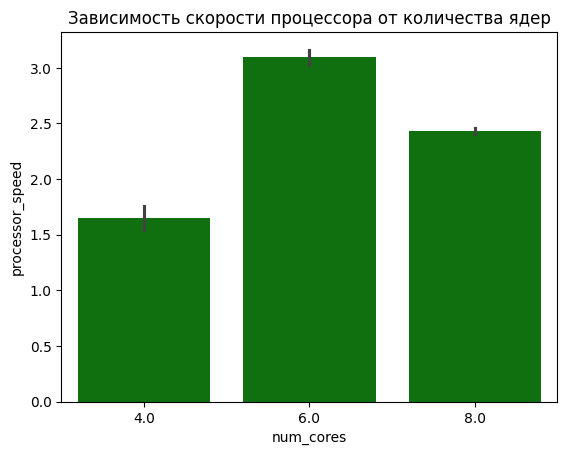

In [137]:
plt.title('Зависимость скорости процессора от количества ядер')
sns.barplot( x = df.num_cores, y = df.processor_speed, color = 'green')

Из графика видно, что медианное значение скорости процессора отличается в зависимость от количества ядер.

In [138]:
#запись в словарь медианных значений
dict_to_proc_speed = dict(df.dropna(subset = ['processor_speed']).groupby('num_cores')['processor_speed'].median()) 
dict_to_proc_speed

{4.0: 1.6, 6.0: 3.22, 8.0: 2.3}

In [139]:
#замена пропущенных значений медианными из словаря
df['processor_speed'] = df.apply(lambda x: x['processor_speed'] if pd.notna(x['processor_speed']) else dict_to_proc_speed[x['num_cores']], axis = 1) 

Рассмотрим зависимость признаков друг от друга

<Axes: >

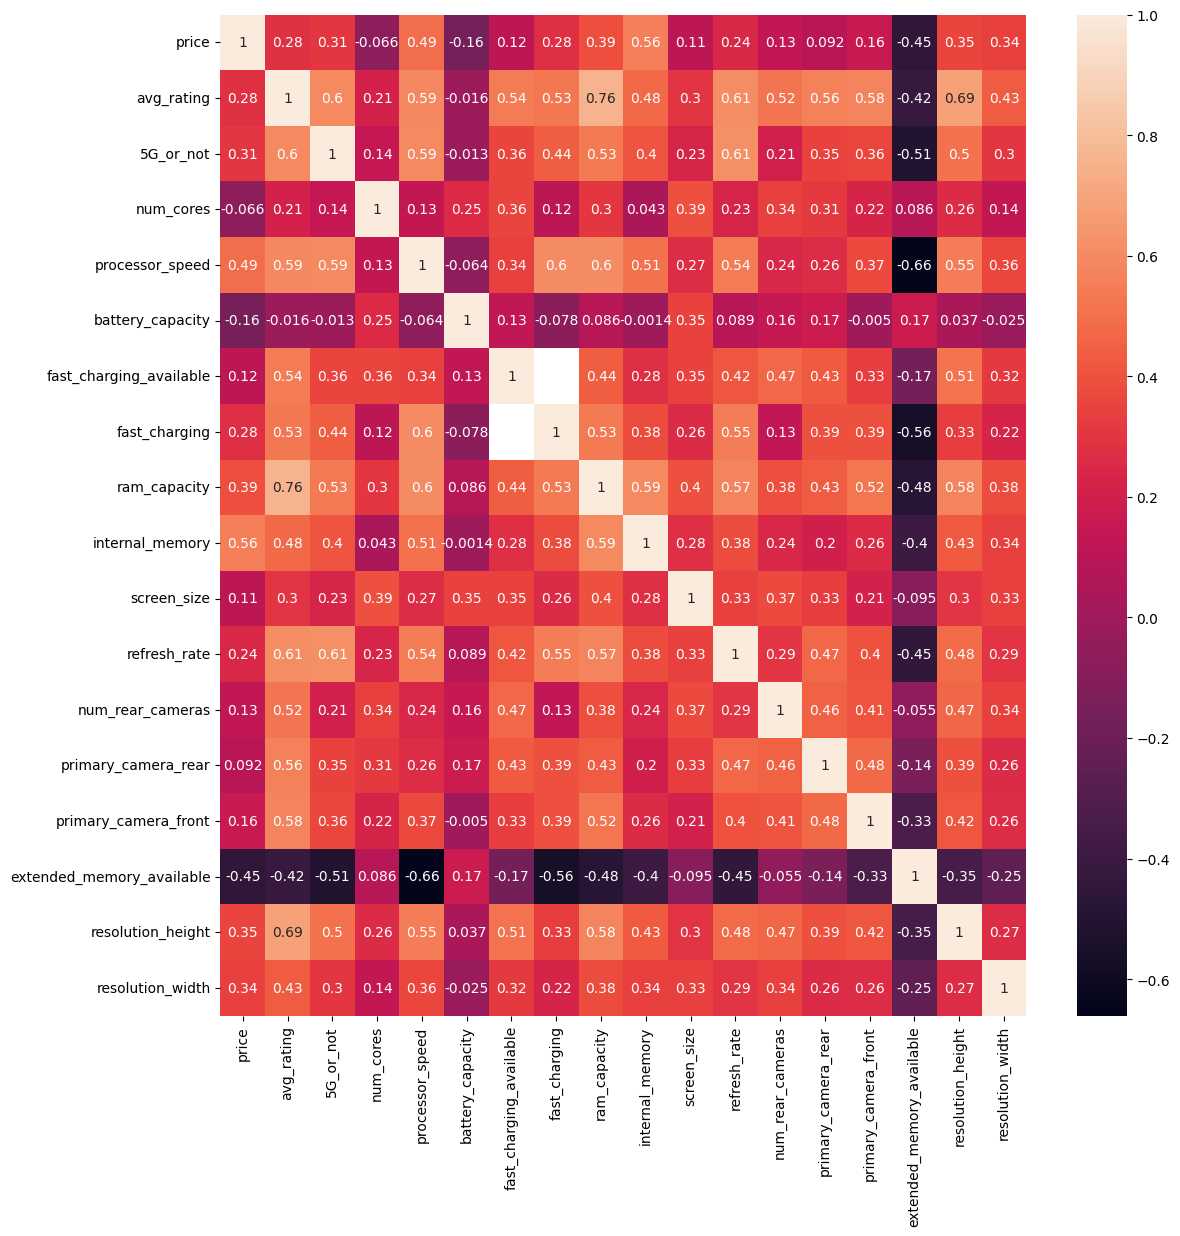

In [140]:
#создание отдельного датасета с только числовыми признаками
df_count=df.select_dtypes(['int', 'float'])
#отрисовка тепловой карты для поиска линейной зависимости
plt.figure(figsize=(13,13))
sns.heatmap(df_count.corr(), annot=True)

Из heatmap видно, что емкость аккумулятора не имеет сильной линейной зависимости ни от одного из признаков в датасете. Заполним пропущенные значения медианными.

In [141]:
df['battery_capacity'].fillna(df['battery_capacity'].median(), inplace = True)

#аналогичным способом заполним колонку primary_camera_front

df['primary_camera_front'].fillna(df['primary_camera_front'].median(), inplace = True)

C:\Users\berse\AppData\Local\Temp\ipykernel_20484\1795140062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['battery_capacity'].fillna(df['battery_capacity'].median(), inplace = True)
C:\Users\berse\AppData\Local\Temp\ipykernel_20484\1795140062.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [142]:
fast_charging_median = df['fast_charging'].median()
fast_charging_median

33.0

In [143]:
df['fast_charging'].unique()

array([ nan,  18.,  25.,  65., 120.,  30.,  10.,  33.,  67.,  66., 100.,
        22.,  40.,  55.,  45., 180., 200.,  80.,  44.,  68., 125.,  20.,
       135., 165., 150.,  50.,  60., 240.,  15.,  21.,  19.,  27., 210.])

In [144]:
fast_charging_dict = {0: 0, 1: 33.0}
fast_charging_dict

{0: 0, 1: 33.0}

Пропущенные значения в столбце fast_charging заполним нулями, если столбец fast_charging_available == 0, в противном случае медианным значением.

In [145]:
df['fast_charging'] = df.apply(lambda x: x['fast_charging'] if pd.notna(x['fast_charging']) else fast_charging_dict[x['fast_charging_available']], axis = 1)

In [146]:
df['fast_charging'].unique()

array([  0.,  18.,  33.,  25.,  65., 120.,  30.,  10.,  67.,  66., 100.,
        22.,  40.,  55.,  45., 180., 200.,  80.,  44.,  68., 125.,  20.,
       135., 165., 150.,  50.,  60., 240.,  15.,  21.,  19.,  27., 210.])

Пропущенные значения в processor_brand заполним 'no brand', поскольку в дальнейшем этот признак не будет использоваться при машинном обучении

In [147]:
df['processor_brand'].fillna('no_brand', inplace = True)

C:\Users\berse\AppData\Local\Temp\ipykernel_20484\3135959323.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['processor_brand'].fillna('no_brand', inplace = True)


Осталось заполнить столбец рейтинга, который зависит от множества факторов с помощью transform

<Axes: title={'center': 'Зависимость стоимости от рейтинга'}, xlabel='price', ylabel='avg_rating'>

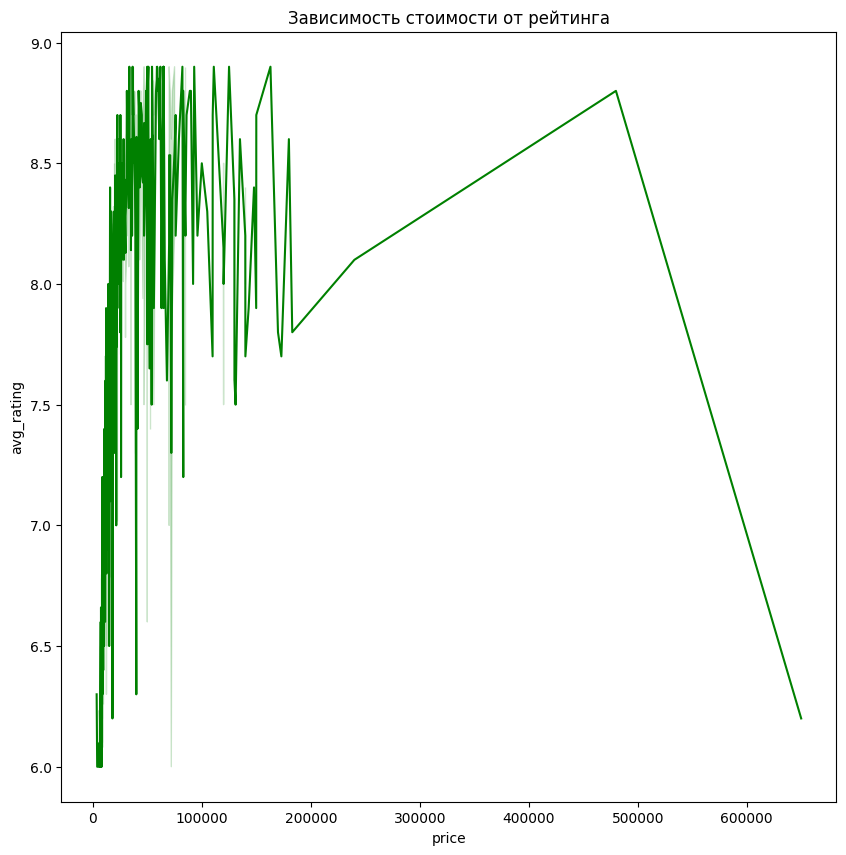

In [148]:
plt.figure(figsize =(10, 10))
plt.title('Зависимость стоимости от рейтинга')
sns.lineplot(data = df, x = df['price'], y = df['avg_rating'], color = 'g')

In [149]:
X = df_count.copy(deep = True) #создаем копию датасета c только числовыми признаками

# определяем импортер

myImputer=IterativeImputer()
myImputer.fit(X) 

#получаем восстановленные данные

myImputer_data = myImputer.transform(X)
myImputer_data = pd.DataFrame(myImputer_data,columns = df_count.columns)

In [150]:
myImputer_data

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,38999.0,7.3,0.0,6.0,2.65,3110.000000,0.0,26.645332,4.0,64.0,6.10,60.0,2.0,12.0,12.0,0.0,1792.0,828.0
1,46999.0,7.5,0.0,6.0,2.65,3110.000000,0.0,24.315194,4.0,128.0,6.10,60.0,2.0,12.0,12.0,0.0,1792.0,828.0
2,109900.0,7.7,0.0,6.0,2.65,3500.000000,1.0,18.000000,4.0,64.0,6.50,60.0,3.0,12.0,12.0,0.0,2688.0,1242.0
3,51999.0,7.4,1.0,6.0,3.10,4354.557273,0.0,37.239805,4.0,64.0,6.10,60.0,2.0,12.0,12.0,0.0,2532.0,1170.0
4,55999.0,7.5,1.0,6.0,3.10,4391.436407,0.0,36.709816,4.0,128.0,6.10,60.0,2.0,12.0,12.0,0.0,2532.0,1170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,13999.0,7.5,0.0,8.0,2.30,5020.000000,1.0,18.000000,4.0,64.0,6.67,60.0,4.0,48.0,16.0,1.0,2400.0,1080.0
976,14439.0,7.7,0.0,8.0,2.30,5020.000000,1.0,18.000000,4.0,128.0,6.67,60.0,4.0,48.0,16.0,1.0,2400.0,1080.0
977,16490.0,8.0,0.0,8.0,2.30,5020.000000,1.0,33.000000,6.0,64.0,6.67,60.0,4.0,64.0,32.0,1.0,2400.0,1080.0
978,19999.0,8.2,1.0,8.0,3.20,4200.000000,1.0,55.000000,6.0,128.0,6.90,120.0,4.0,50.0,16.0,1.0,2460.0,1080.0


In [151]:
#отдельный датафрейм с категориальными признаками

df_object = df.select_dtypes(['object']) 

#объединение двух новых датафреймов в один

new_df = pd.concat([df_object, myImputer_data], axis = 1)

#проверка на наличие пропущенных значений
new_df.isna().sum()

brand_name                   0
model                        0
processor_brand              0
os                           0
price                        0
avg_rating                   0
5G_or_not                    0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
resolution_height            0
resolution_width             0
dtype: int64

Рассмотрим на гистограмме изменилось ли распределение после заполнения, чтобы проверить его корректность

Text(0.5, 1.0, 'Распределение rating до заполнения NaN')

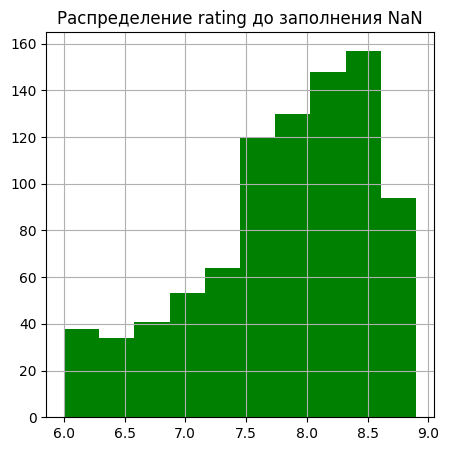

In [152]:
plt.figure(figsize = (5, 5))
df['avg_rating'].hist(color = 'g')
plt.title('Распределение rating до заполнения NaN')

Text(0.5, 1.0, 'Распределение rating после заполнения NaN')

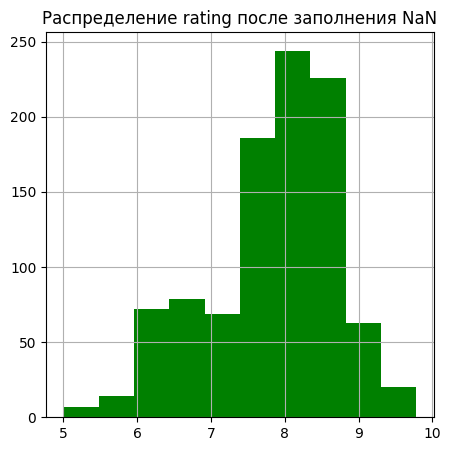

In [153]:
plt.figure(figsize = (5, 5))
new_df['avg_rating'].hist(color = 'g')
plt.title('Распределение rating после заполнения NaN')

Распределение не изменилось, значит данные подобраны верно

**Построение гистограмм для всего датасета**

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'avg_rating'}>,
        <Axes: title={'center': '5G_or_not'}>,
        <Axes: title={'center': 'num_cores'}>],
       [<Axes: title={'center': 'processor_speed'}>,
        <Axes: title={'center': 'battery_capacity'}>,
        <Axes: title={'center': 'fast_charging_available'}>,
        <Axes: title={'center': 'fast_charging'}>],
       [<Axes: title={'center': 'ram_capacity'}>,
        <Axes: title={'center': 'internal_memory'}>,
        <Axes: title={'center': 'screen_size'}>,
        <Axes: title={'center': 'refresh_rate'}>],
       [<Axes: title={'center': 'num_rear_cameras'}>,
        <Axes: title={'center': 'primary_camera_rear'}>,
        <Axes: title={'center': 'primary_camera_front'}>,
        <Axes: title={'center': 'extended_memory_available'}>],
       [<Axes: title={'center': 'resolution_height'}>,
        <Axes: title={'center': 'resolution_width'}>, <Axes: >, <Axes: >]],
      dtype=object)

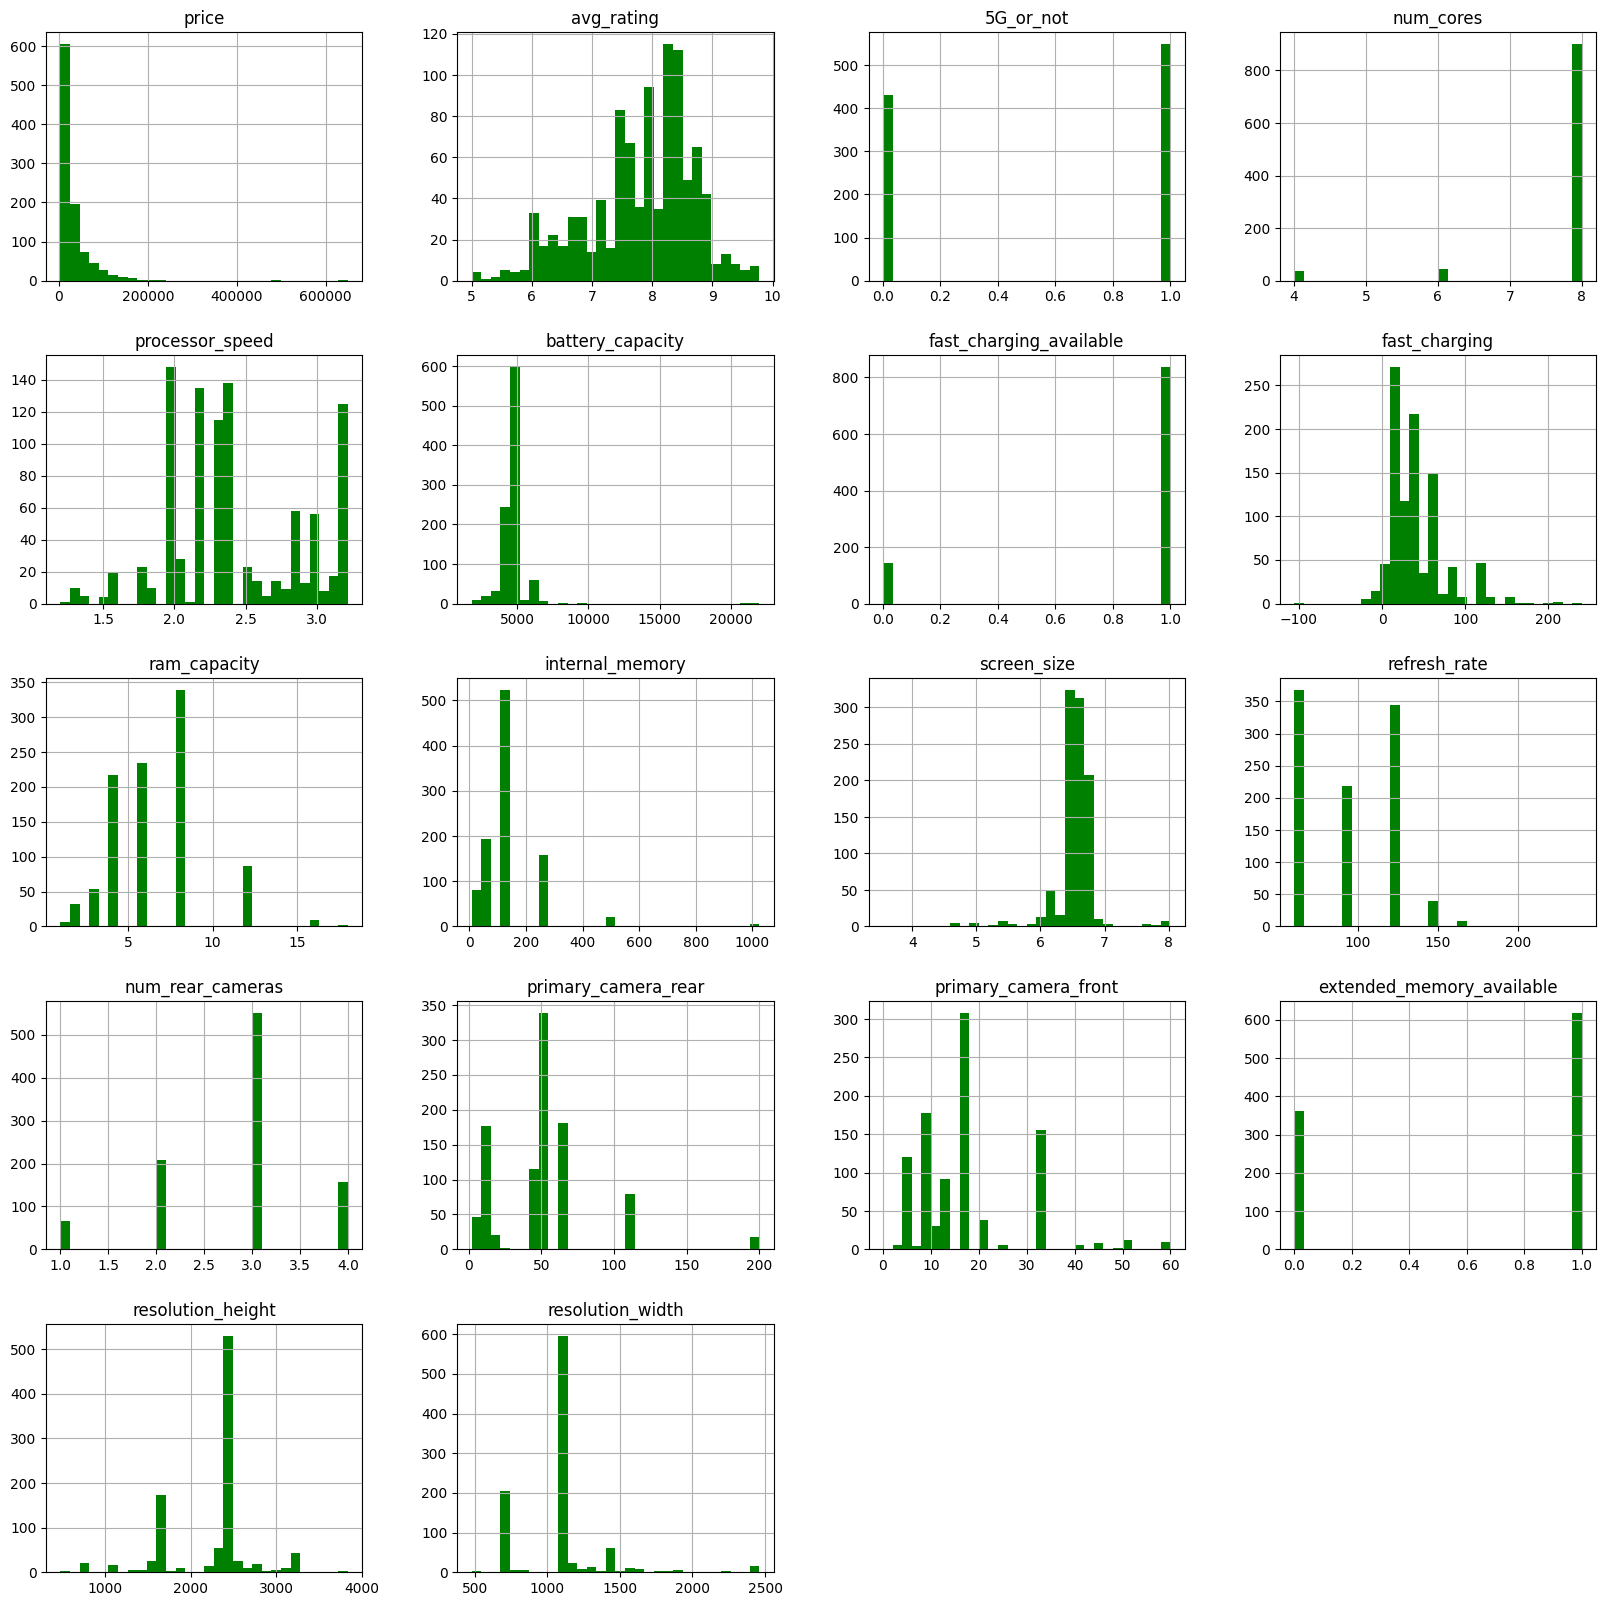

In [154]:
new_df.hist(figsize=(20, 20), bins = 30, color ='g')

Из гистограмм видно, что признаки, не относящиеся к бинарной классификации распределены нормально

Рассмотрим уникальные значения в категориальных столбцах. В столбце 'model' все значения уникальны, поэтому нет смысла их кодировать и использовать при обучении, все они также отличаются характеристиками. Также не будем кодировать столбец 'processor_brand' так как на стоимость в большей степени оказывают влияние другие признаки, относящиеся к процессору - num_cores и processor_speed. 

In [155]:
new_df['brand_name'].unique()

array(['apple', 'asus', 'blackview', 'blu', 'cat', 'cola', 'doogee',
       'duoqin', 'gionee', 'google', 'honor', 'huawei', 'ikall',
       'infinix', 'iqoo', 'itel', 'jio', 'lava', 'leeco', 'leitz',
       'lenovo', 'letv', 'lg', 'lyf', 'micromax', 'motorola', 'nokia',
       'nothing', 'nubia', 'oneplus', 'oppo', 'oukitel', 'poco', 'realme',
       'redmi', 'royole', 'samsung', 'sharp', 'sony', 'tcl', 'tecno',
       'tesla', 'vertu', 'vivo', 'xiaomi', 'zte'], dtype=object)

Столбец 'brand_name' содержит более 13 уникальных значений, для его кодирования неразумно использовать one-hot encoding, однако можно использовать impact encoding. Посмотрим есть ли достаточное количество значений по каждому уникальному названию чтобы оценить целесообразность метода.

In [156]:
brand_name_count = new_df.groupby(by = 'brand_name', as_index = False)[ 'price'].agg('count')

<Axes: title={'center': 'Количество представленных моделей каждого бренда '}, xlabel='Бренд', ylabel='Количество'>

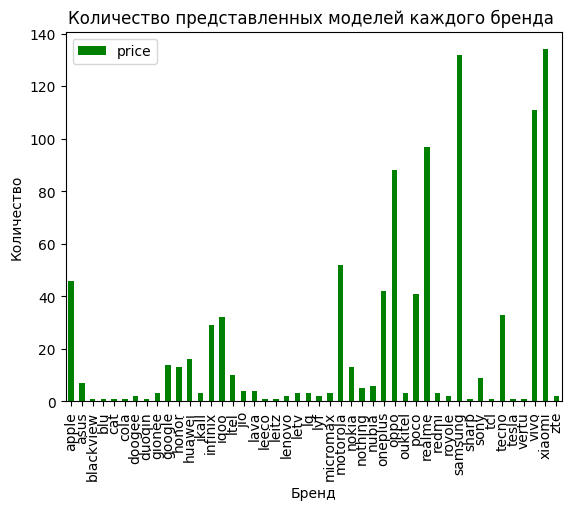

In [157]:

brand_name_count.set_index('brand_name').plot(kind = 'bar', xlabel = 'Бренд', ylabel = 'Количество', title = 'Количество представленных моделей каждого бренда ', color = 'g')

Из графика видно, что у многих брендов представлено менее 5 моделей смартфонов, у некоторых только по 1. Таким образом может быть не обеспечена достаточная статистическая значимость и кодирование признака может привести к переобучению. Попробуем закодировать признак и посмотрим как это скажется на качестве модели.

In [158]:
# Создаем объект TargetEncoder
encoder_2 = TargetEncoder()

# Обучаем кодировщик на данных
encoder_2.fit(new_df['brand_name'], new_df['price'])

# Кодируем категориальную переменную
new_df['brand_encoded'] = encoder_2.transform(new_df['brand_name'])

In [159]:
new_df['os'].unique()

array(['ios', 'android', 'other'], dtype=object)

В столбце 'os' всего 3 уникальных значения, используем метод one-hot encoding.

In [160]:
#применение one-hot encoding с удалением первого столбца, чтобы избежать дамми-ловушку (мультиколлинеарность)
encoder = OneHotEncoder(sparse_output= False, drop = 'first')
#создание датафрейма с новыми признаками
encoder_df = pd.DataFrame(encoder.fit_transform(new_df[['os']]))
#новые наименования столбцов
encoded_columns_name = encoder.get_feature_names_out(['os'])
encoder_df.columns = encoded_columns_name
#соединение с бывшим датафреймом
new_df = pd.concat([new_df, encoder_df], axis =1 )
new_df.sample(3)

,brand_name,model,processor_brand,os,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,...,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width,brand_encoded,os_ios,os_other
946,xiaomi,Xiaomi Redmi Note 11S,helio,android,14590.0,8.0,0.0,8.0,2.05,5000.00000,...,90.0,4.0,108.0,16.0,1.0,2400.0,1080.0,27961.162984,0.0,0.0
947,xiaomi,Xiaomi Redmi Note 11S (6GB RAM + 128GB),helio,android,15499.0,8.1,0.0,8.0,2.05,5000.00000,...,90.0,4.0,108.0,16.0,1.0,2400.0,1080.0,27961.162984,0.0,0.0
7,apple,Apple iPhone 12 Mini (128GB),bionic,ios,45999.0,7.5,1.0,6.0,3.10,4454.38552,...,60.0,2.0,12.0,12.0,0.0,2340.0,1080.0,91579.964301,1.0,0.0


После кодирования категориальных переменных добавилось 3 новых столбца

**Проверка данных на наличие выбросов**

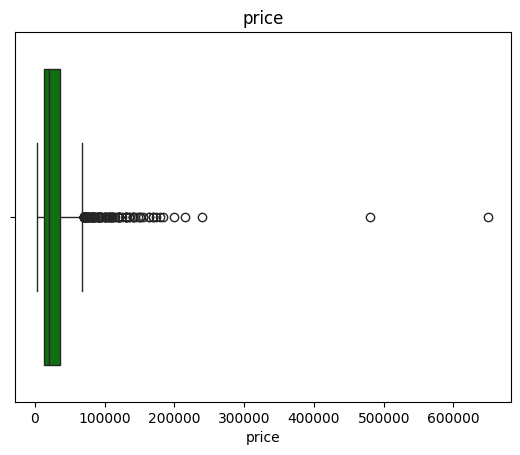

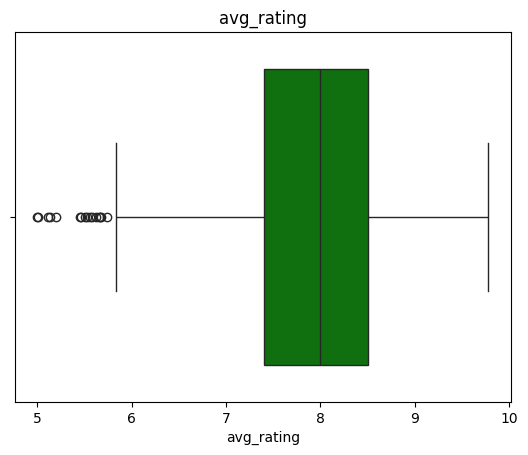

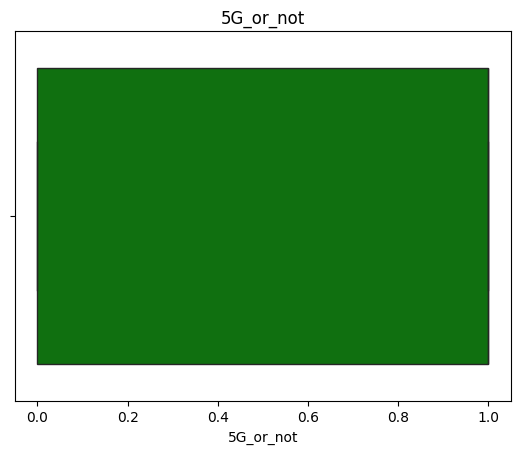

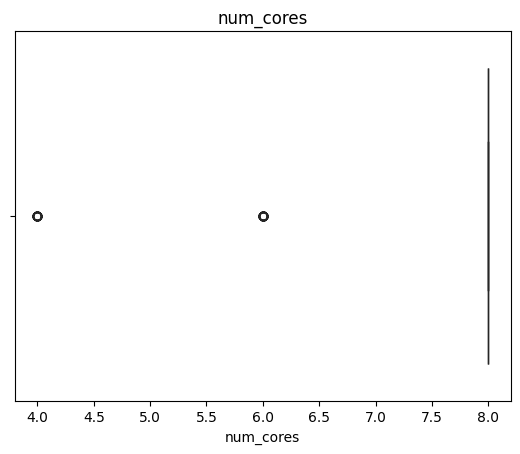

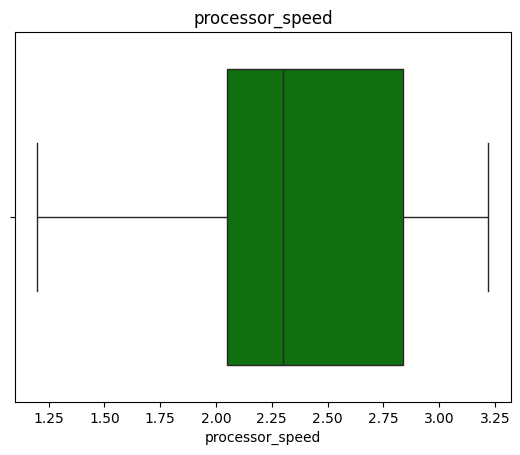

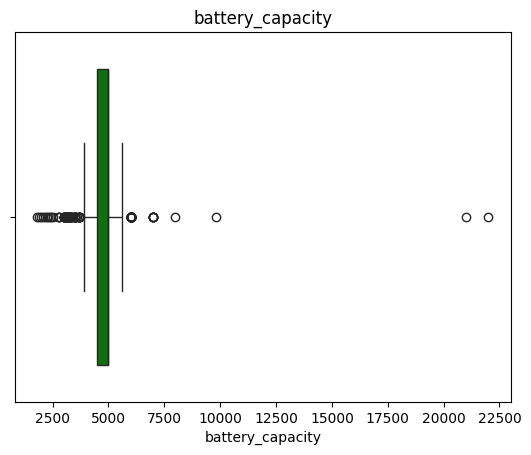

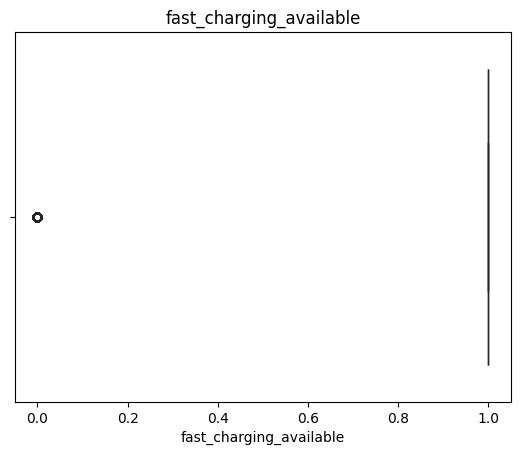

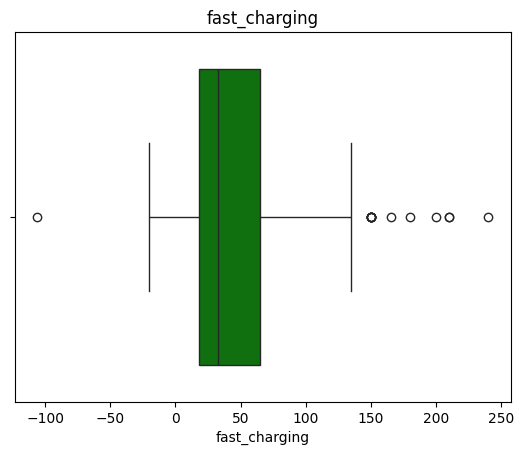

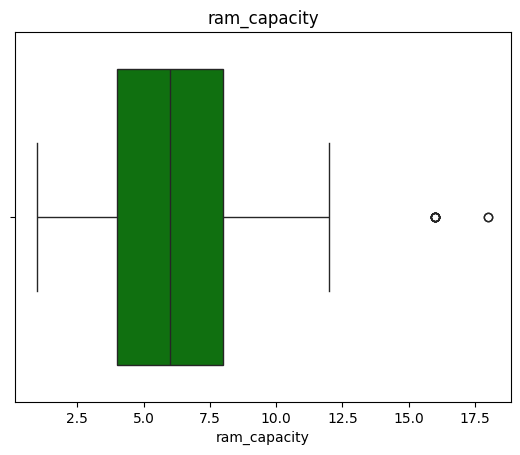

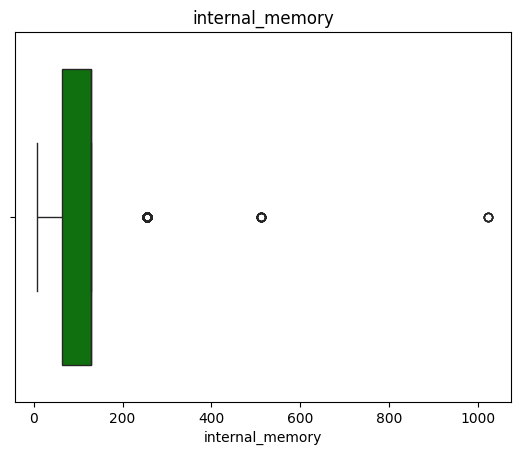

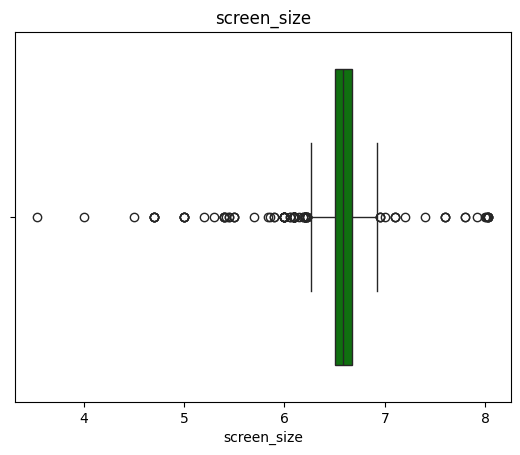

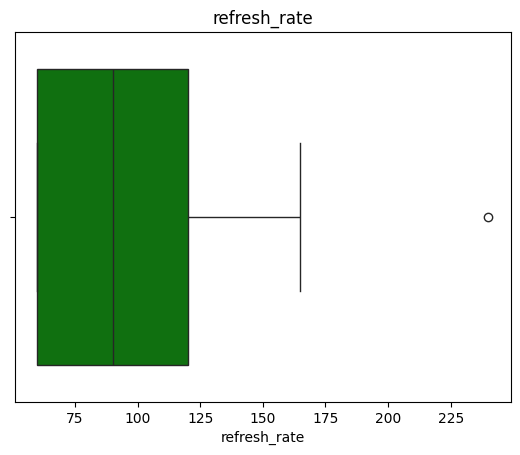

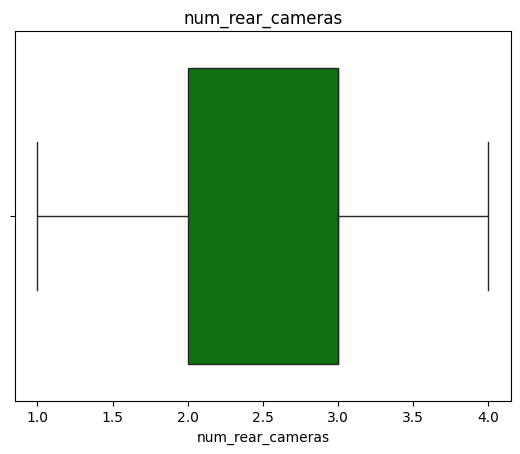

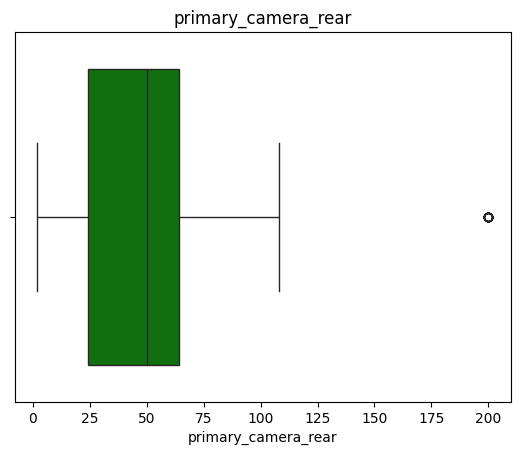

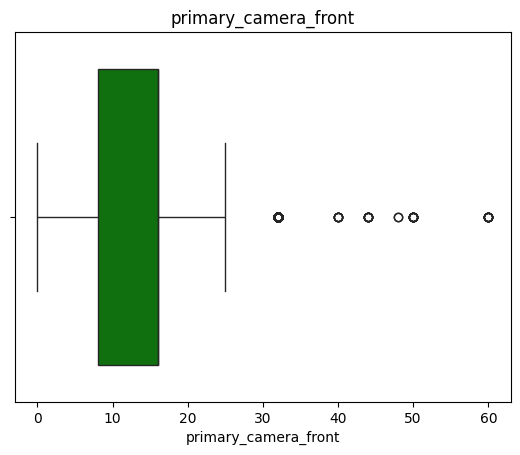

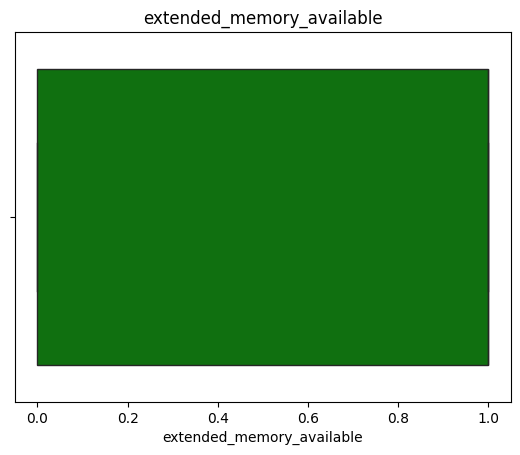

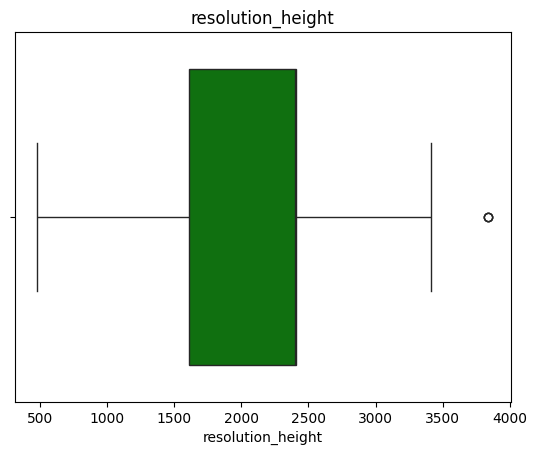

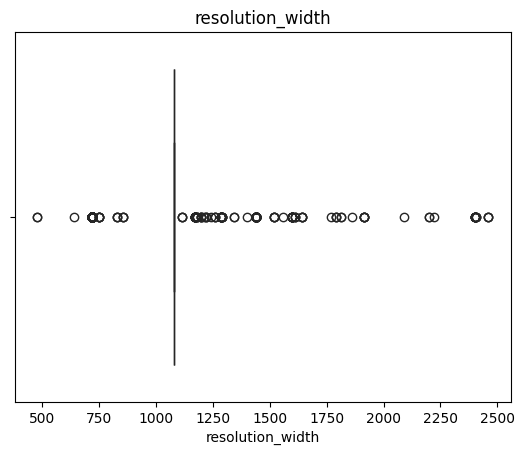

In [161]:
df_count_columns = list(df_count.columns)
for column in df_count_columns:
      plt.figure()
      sns.boxplot(data = new_df[column], orient = 'h', color = 'green')
      plt.title(column)

Из представленных выше boxplot видно, что некоторые значения в целевом признаке price сильно отличаются от остальных, что в последствии может влиять на качество модели. Для того, чтобы этого избежать - удаляются все модели телефонов стоимостью более 180000.

<Axes: xlabel='price'>

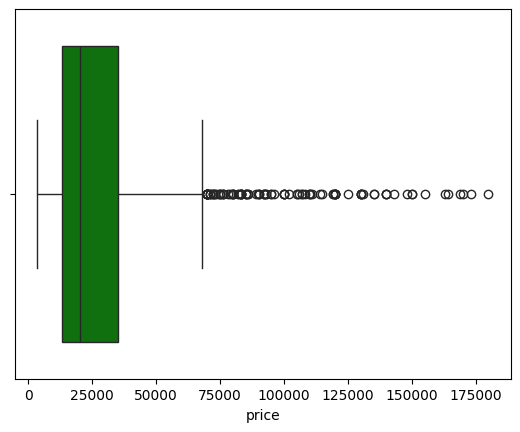

In [162]:
new_df = new_df[new_df.price < 180000]
sns.boxplot(data = new_df['price'], orient = 'h', color = 'green')

**Вывод:** датасет содержит 980 строк и 22 признака, целевой признак - target. Пропущенные значения в датасете были заполнены медианным значением, подобранными категориальными признаками, а также с помощью методов one-hot encoding и impact encoding были преобразованы категориальные признаки. По построенным графикам видно, что большинство признаком имеют нормальное распределение и в дальнейшем их можно будет нормализировать с помощью StandartScaler. Также были построены boxplot для проверки данных на наличие выбросов, в целевом признаке price были удалены наиболее выбивающиеся значения. Также большое количество выбросов в признаках avg_rating и resolution_width. 

**Построение модели машинного обучения**  
Целевой признак датасета - price, необходимо делать предсказание цены смартфона по его характеристикам. Таким образом, необходимо решить задачу **регрессии**. Поскольку стоимость - непрерывная величина.

Основные метрики при решении задачи регрессии - MAE, MAPE, MSE, RMSE. Ранее были построены графики boxplot, по которым видно, что данные имеют достаточно большое количество выбросов, к которым MSE и RMSE метрики очень чувствительны. Поэтому необходимо рассчитывать качество модели по средней абсолютной ошибке, однако метрика MAE неудобна для интерпретации результатов, поэтому будет использоваться ее аналог, выраженный в процентах - MAPE.

In [163]:
#удаление категориальных признаков из датафрейма

columns_for_del = new_df.select_dtypes('object').columns
columns_for_del=list(columns_for_del)

# удаление целевого признака, для отделения фичей

columns_for_del.append('price')

#удаление признаков, которые негативно сказываются на качестве модели

columns_for_del.append('avg_rating')
columns_for_del.append('resolution_width')
columns_for_del.append('os_ios')
columns_for_del.append('os_other')

price - целевой признак  

In [164]:
#признаки
X = new_df.drop(columns_for_del, axis = 1)
#целевой признак
y = new_df['price']
new_df.head()

,brand_name,model,processor_brand,os,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,...,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width,brand_encoded,os_ios,os_other
0,apple,Apple iPhone 11,bionic,ios,38999.0,7.3,0.0,6.0,2.65,3110.000000,...,60.0,2.0,12.0,12.0,0.0,1792.0,828.0,91579.964301,1.0,0.0
1,apple,Apple iPhone 11 (128GB),bionic,ios,46999.0,7.5,0.0,6.0,2.65,3110.000000,...,60.0,2.0,12.0,12.0,0.0,1792.0,828.0,91579.964301,1.0,0.0
2,apple,Apple iPhone 11 Pro Max,bionic,ios,109900.0,7.7,0.0,6.0,2.65,3500.000000,...,60.0,3.0,12.0,12.0,0.0,2688.0,1242.0,91579.964301,1.0,0.0
3,apple,Apple iPhone 12,bionic,ios,51999.0,7.4,1.0,6.0,3.10,4354.557273,...,60.0,2.0,12.0,12.0,0.0,2532.0,1170.0,91579.964301,1.0,0.0
4,apple,Apple iPhone 12 (128GB),bionic,ios,55999.0,7.5,1.0,6.0,3.10,4391.436407,...,60.0,2.0,12.0,12.0,0.0,2532.0,1170.0,91579.964301,1.0,0.0


Данные будут разделяться на 3 выборки - тестовая, валидационная и обучающая

In [165]:
#Разделение данных на тренировочную и тестовую выборки
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Разделение тренировочной выборки на тренировочную и валидационную часть
X_test, X_val, y_test, y_val = train_test_split(X_test1, y_test1, test_size = 0.5, random_state = 42)

Данные разделены в соотношении 80% - тренировочная выборка, 10% - валидационная, 10% - тестовая

Применение масштабирования признаков. Поскольку данные распределены нормально - используется StandartScaler()

In [166]:
scaler = StandardScaler()
#обучение на тренировочной выборке
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_val_sc = scaler.transform(X_val)
X_test_sc = scaler.transform(X_test)
X_train_sc

array([[-1.13926955,  0.29070595, -0.94549111, ...,  0.75955453,
         0.24749038, -0.23956366],
       [ 0.8777554 ,  0.29070595, -0.17467357, ...,  0.75955453,
         0.48359   , -0.13081027],
       [ 0.8777554 ,  0.29070595, -0.51725914, ...,  0.75955453,
         0.36554019, -0.23956366],
       ...,
       [-1.13926955,  0.29070595, -0.30314316, ...,  0.75955453,
         0.36554019, -0.23956366],
       [-1.13926955,  0.29070595, -0.51725914, ...,  0.75955453,
         0.36554019, -0.75053759],
       [-1.13926955,  0.29070595,  0.85308316, ...,  0.75955453,
         0.95578922,  1.28270587]])

В качестве моделей будут использованы линейнвя регрессия, дерево решений, случайный лес и градиентный бустинг. Также будет реализована dummy модель для сравнения результатов.

In [167]:
#построение dummy-модели
dummy_model = DummyRegressor(strategy="mean")

dummy_model.fit(X_train, y_train)

# Делаем предсказания
y_pred = dummy_model.predict(X_val_sc)

# Вычисляем среднеквадратичную ошибку
dummy_MAPE = mean_absolute_percentage_error(y_val, y_pred)
dummy_MAPE

0.963785680389683

При построении dummy-модели показатель метрики MAPE  96%, что говорит об очень низком качестве модели.

**Модель линейной регрессии**

In [168]:
lr_model=linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred=lr_model.predict(X_val)
lr_MAPE = mean_absolute_percentage_error(y_val, y_lr_pred)
lr_MAPE


0.43894138337707406

При применении модели линейной регрессии качество существенно улучшилось, но все еще осталось низким.

**Модель дерева решений**

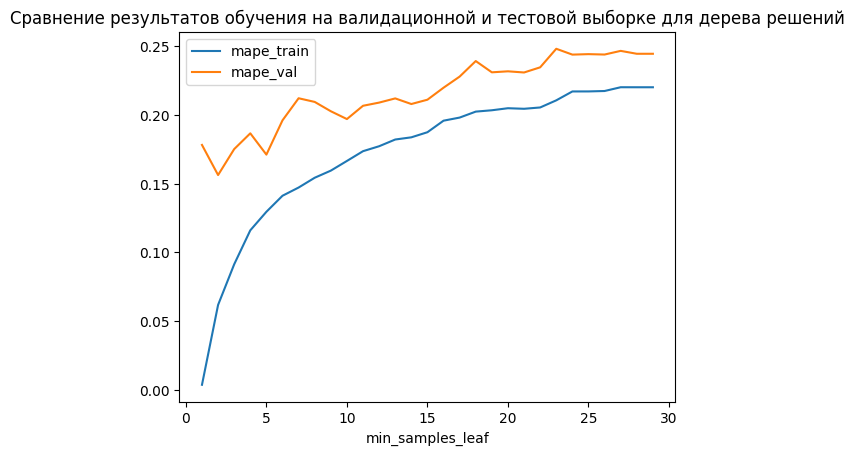

In [169]:
result =[]
for i in range (1, 30):
      tree_model = tree.DecisionTreeRegressor (min_samples_leaf = i, random_state = 11)
      tree_model.fit(X_train_sc, y_train)
      pred_train = tree_model.predict(X_train_sc)
      pred_val = tree_model.predict(X_val_sc)

      result.append([i, mean_absolute_percentage_error(pred_train, y_train), mean_absolute_percentage_error(pred_val, y_val)])
result_pd = pd.DataFrame(result, columns = ['min_samples_leaf', 'mape_train','mape_val'])
result_pd.set_index('min_samples_leaf')['mape_train'].plot(label = 'mape_train', title= ('Сравнение результатов обучения на валидационной и тестовой выборке для дерева решений'))
result_pd.set_index('min_samples_leaf')['mape_val'].plot(label = 'mape_val')
plt.legend()

In [170]:
tree_MAPE = result_pd[result_pd['mape_val'] == result_pd['mape_val'].min()]
tree_MAPE

,min_samples_leaf,mape_train,mape_val
1,2,0.061615,0.156161


При использовании модели дерева решений ошибка уменьшилась дл 16% и уже стала приемлемой. В следующих пунктах попробуем улучшить качество модели с помощью ансамблирования.

**Случайный лес**

In [171]:
forest_model = RandomForestRegressor(n_estimators = 30, min_samples_leaf = 2, random_state = 11)
forest_model.fit(X_train_sc, y_train)
pred_train = forest_model.predict(X_train_sc)
pred_val = forest_model.predict(X_val_sc)
print('MAPE на тренировочной выборке:', mean_absolute_percentage_error(pred_train, y_train))
print('MAPE на валидационной выборке:', mean_absolute_percentage_error(pred_val, y_val))
forest_MAPE = mean_absolute_percentage_error(pred_val, y_val)

MAPE на тренировочной выборке: 0.0869026402146264
MAPE на валидационной выборке: 0.13804699641243923


При применении модели случайного леса качество модели улучшилось, ошибка составила 14%

Для определения лучших гиперпараметров используем GridSearchCV

In [172]:
# определение параметров
param_grid = {
    'n_estimators': [3, 5, 10, 15, 30],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator = forest_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)

grid_search.fit(X_train_sc, y_train)

best_params = grid_search.best_params_
print("Лучшие гиперпараметры:", best_params)

best_forest_model = RandomForestRegressor(**best_params, random_state=42)
best_forest_model.fit(X_train_sc, y_train)
pred_train = best_forest_model.predict(X_train_sc)
pred_val = best_forest_model.predict(X_val_sc)
print(mean_absolute_percentage_error(pred_train, y_train))
print(mean_absolute_percentage_error(pred_val, y_val))
best_forest_MAPE = mean_absolute_percentage_error(pred_val, y_val)

Лучшие гиперпараметры: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
0.06973761650234188
0.14918091094294048


c:\Users\berse\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


**Градиентный бустинг**

[0]	validation_0-mape:0.93807	validation_1-mape:0.87832
[1]	validation_0-mape:0.86272	validation_1-mape:0.80580
[2]	validation_0-mape:0.79366	validation_1-mape:0.74219
[3]	validation_0-mape:0.73122	validation_1-mape:0.68354
[4]	validation_0-mape:0.67380	validation_1-mape:0.63234
[5]	validation_0-mape:0.62137	validation_1-mape:0.58366
[6]	validation_0-mape:0.57434	validation_1-mape:0.54131
[7]	validation_0-mape:0.53055	validation_1-mape:0.49939
[8]	validation_0-mape:0.49162	validation_1-mape:0.46523
[9]	validation_0-mape:0.45607	validation_1-mape:0.43288
[10]	validation_0-mape:0.42272	validation_1-mape:0.40215
[11]	validation_0-mape:0.39325	validation_1-mape:0.37625
[12]	validation_0-mape:0.36633	validation_1-mape:0.35246
[13]	validation_0-mape:0.34181	validation_1-mape:0.33125
[14]	validation_0-mape:0.31936	validation_1-mape:0.31198
[15]	validation_0-mape:0.29902	validation_1-mape:0.29418
[16]	validation_0-mape:0.28072	validation_1-mape:0.27951
[17]	validation_0-mape:0.26401	validation

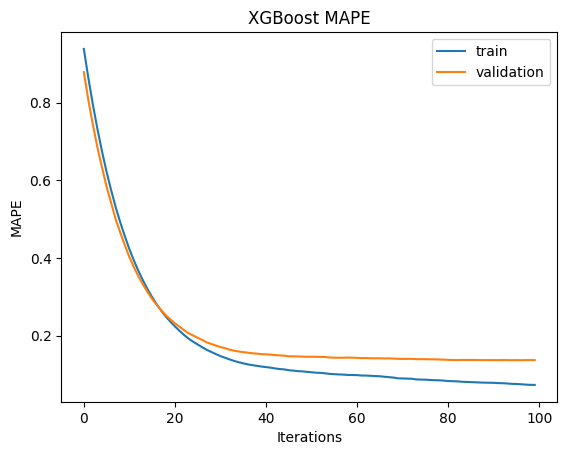

In [173]:
XGB_model = XGBRegressor(n_estimators = 100, learning_rate = 0.09, eval_metric = 'mape')
XGB_model.fit(X_train_sc, y_train, eval_set = [(X_train_sc, y_train), (X_val_sc, y_val)])
train_XGB_pred = XGB_model.predict(X_train_sc)
val_XGB_pred = XGB_model.predict(X_val_sc)
epochs = len(XGB_model.evals_result()['validation_0']['mape'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, XGB_model.evals_result()['validation_0']['mape'], label = 'train')
ax.plot(x_axis, XGB_model.evals_result()['validation_1']['mape'], label = 'validation')

plt.title('XGBoost MAPE')
plt.xlabel('Iterations')
plt.ylabel('MAPE')
plt.legend()

Вновь воспользуемся GridSearchCV для определения лучших гиперпараметров

In [174]:
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.07, 0.08, 0.09, 0.1, 0.3],
    'colsample_bytree': [0.7, 0.8, 0.85, 0.9, 0.95, 1.0]
}

grid_search = GridSearchCV(estimator = XGB_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)

grid_search.fit(X_train_sc, y_train)

best_params = grid_search.best_params_
print("Лучшие гиперпараметры:", best_params)

best_XGB_model = XGBRegressor(**best_params, random_state=42)
best_XGB_model.fit(X_train_sc, y_train)
pred_train = best_XGB_model.predict(X_train_sc)
pred_val = best_XGB_model.predict(X_val_sc)
print(mean_absolute_percentage_error(pred_train, y_train))
print(mean_absolute_percentage_error(pred_val, y_val))
best_XGB_MAPE = mean_absolute_percentage_error(pred_val, y_val)

c:\Users\berse\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Лучшие гиперпараметры: {'colsample_bytree': 0.9, 'learning_rate': 0.07, 'n_estimators': 500}
0.02024569617196838
0.13146467697316186


In [175]:
XGB_mapes = XGB_model.evals_result()['validation_1']['mape']
XGB_MAPE = np.min(XGB_mapes)

Среди всех моделей лучшие показатели на валидации метрики MAPE имеются у градиентного бустинга с использованием GridSearchCV. Применим модель к тестовой выборке

In [176]:
#рассчитаем значение метрики MAPE для тестовой выборки

pred_test = best_XGB_model.predict(X_test_sc)
print('Значение MAPE для градиентного бустинга с подбором гиперпараметров:', mean_absolute_percentage_error(pred_test, y_test))

Значение MAPE для градиентного бустинга с подбором гиперпараметров: 0.14130037538189902


In [177]:
pred_test = XGB_model.predict(X_test_sc)
print('Значение MAPE для градиентного бустинга с подобранными вручную параметрами', mean_absolute_percentage_error(pred_test, y_test))

Значение MAPE для градиентного бустинга с подобранными вручную параметрами 0.13995823229926885


**Вывод**: в результате применения моделей машинного обучения, таких как линейная регрессия, деревянная модель, случайный лес, градиентный бустинг. Наилучший результат показала модель градиентного бустинга и получилось выбить метрику MAPE менее 14%, в то время как dummy модель показывала ошибку в 96%. Таким обраом в данной задаче необходимо применение более сложный моделей машинного обучения для получения приемлемого результата.